In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split

import sklearn.metrics as sklmet
from sklearn import svm 

from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

In [2]:
raw_df = pd.read_csv('15134.csv')

In [3]:
#function for fitting using rbf kernel

def rbf_fit(X_train,y_train,C_range,gam_range):
    parameters = [{'C': C_range, 'kernel': ['rbf'], 'gamma': gam_range}]
    grid_search = GridSearchCV(estimator = svm.SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,                            #Using 10 fold cross validation
                           n_jobs = -1)
    grid_search = grid_search.fit(X_train, y_train)

    accuracy = grid_search.best_score_
    return accuracy, grid_search.best_params_

#function for fitting using linear kernel

def lin_fit(X_train,y_train,C_range):
    parameters = [{'C': C_range, 'kernel': ['linear']}]
    grid_search = GridSearchCV(estimator = svm.SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,                            #Using 10 fold cross validation
                           n_jobs = -1)
    grid_search = grid_search.fit(X_train, y_train)

    accuracy = grid_search.best_score_ 
    return accuracy, grid_search.best_params_

#function for producing confusion matrix for linear kernel

def conf_lin(X_train,y_train,X_test,y_test,C_,z):
    classifier = svm.SVC(kernel='linear', C=C_)
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
    mat = confusion_matrix(y_test, y_predict)
    f = sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    fig = f.get_figure()

    fig.savefig(z+".jpg", dpi=300)
    
    acc = sklmet.classification_report(y_test,y_predict)
    return f, print(acc)

#function for producing confusion matrix for rbf kernel

def conf_rbf(X_train,y_train,X_test,y_test,C_,g,z):
    classifier = svm.SVC(kernel='rbf',gamma=g, C=C_)
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
    mat = confusion_matrix(y_test, y_predict)
    f = sns.heatmap(mat.T, annot=True, fmt='d', cbar=True )
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    fig = f.get_figure()

    fig.savefig(z+".jpg", dpi=300)
    
    
    acc = sklmet.classification_report(y_test,y_predict)
    return f, print(acc)
 


# **2.2**

## **2.2.2 Binary Classification**

### **Labels 0 and 1**

In [4]:
lab_zero_df = raw_df[raw_df['label']==0]   #Taking rows whose label values are 0
lab_one_df = raw_df[raw_df['label']==1]    #Taking all the rows whose label values are 1

# Joining the data having labels 0 and 1

frames = [lab_zero_df, lab_one_df]
df1 = pd.concat(frames) 

df = df1.sample(frac = 1) #randomizing the content 

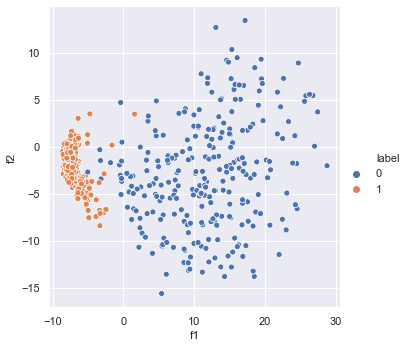

In [5]:
sns.relplot(x="f1", y="f2", data=df, hue='label');

In [6]:
zero_label = df.loc[df.label == 0]
one_label = df.loc[df.label == 1]

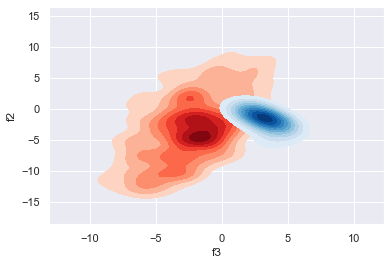

In [7]:
ax = sns.kdeplot(zero_label.f3, zero_label.f2, cmap="Reds", shade=True, shade_lowest=False,bw = 1)
ax = sns.kdeplot(one_label.f3, one_label.f2, cmap="Blues", shade=True, shade_lowest=False,bw = 1)

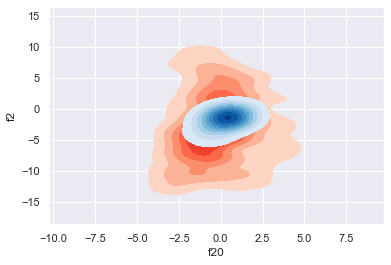

In [8]:
ax = sns.kdeplot(zero_label.f20, zero_label.f2, cmap="Reds", shade=True, shade_lowest=False,bw = 1)
ax = sns.kdeplot(one_label.f20, one_label.f2, cmap="Blues", shade=True, shade_lowest=False,bw = 1)

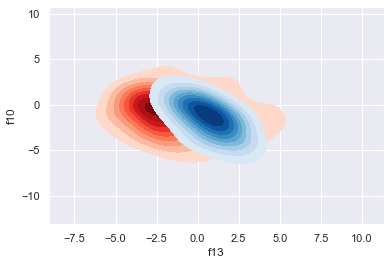

In [9]:
ax = sns.kdeplot(zero_label.f13, zero_label.f10, cmap="Reds", shade=True, shade_lowest=False,bw = 1)
ax = sns.kdeplot(one_label.f13, one_label.f10, cmap="Blues", shade=True, shade_lowest=False,bw = 1)

### *Binary Classification using all 25 features (Classes 0 and 1)*

In [10]:
df.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25', 'label'],
      dtype='object')

In [11]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [12]:
lin_fit(X_train,y_train,np.linspace(0.0001,2,50))

(0.9934782608695653, {'C': 0.040914285714285716, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        62

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



(<matplotlib.axes._subplots.AxesSubplot at 0x1d145e54ec8>, None)

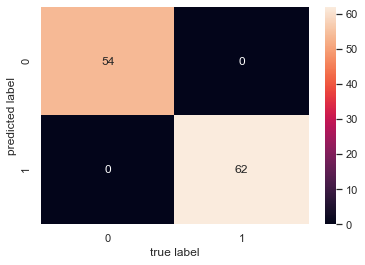

In [13]:
conf_lin(X_train,y_train,X_test,y_test,0.040914285714285716,"25fe_li_bin01")

#### __RBF kernel__

In [14]:
rbf_fit(X_train,y_train,np.linspace(0.0001,2,50),np.linspace(0,1,50))

(0.9870314842578711,
 {'C': 0.8980142857142857, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.95      0.98        62

    accuracy                           0.97       116
   macro avg       0.97      0.98      0.97       116
weighted avg       0.98      0.97      0.97       116



(<matplotlib.axes._subplots.AxesSubplot at 0x1d145bf3948>, None)

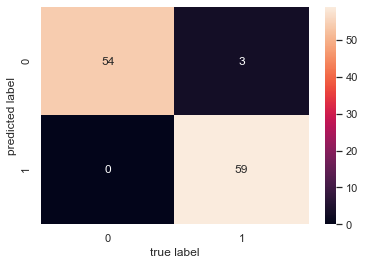

In [15]:
conf_rbf(X_train,y_train,X_test,y_test,1.5102285714285713,0.02040816326530612,"25fe_rbf_bin01")

### *Binary Classification using 25 features (Classes 4 and 9)*

In [16]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [11]:
lin_fit(X_train,y_train,np.linspace(0.001,0.1,100))

(0.9978260869565216, {'C': 0.012, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        57

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



(<matplotlib.axes._subplots.AxesSubplot at 0x2c45f8ccc48>, None)

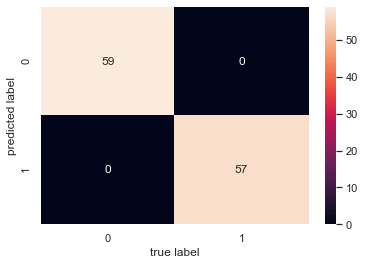

In [13]:
conf_lin(X_train,y_train,X_test,y_test,0.012,"10fe_li_bin01")

#### __RBF kernel__

In [12]:
rbf_fit(X_train,y_train,np.linspace(0.01,2,50),np.linspace(0,1,50))

(0.9869940029985008,
 {'C': 1.4314285714285715, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        59
           1       1.00      0.93      0.96        57

    accuracy                           0.97       116
   macro avg       0.97      0.96      0.97       116
weighted avg       0.97      0.97      0.97       116



(<matplotlib.axes._subplots.AxesSubplot at 0x2c45f875208>, None)

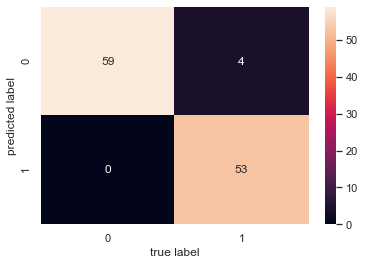

In [14]:
conf_rbf(X_train,y_train,X_test,y_test,1.4314285714285715,0.02040816326530612,"10fe_rbf_bin01")

### **Labels 4 and 9**

In [16]:
lab_zero_df = raw_df[raw_df['label']==4]   #Taking rows whose label values are 4
lab_one_df = raw_df[raw_df['label']==9]    #Taking all the rows whose label values are 9

# Joining the data having labels 0 and 1

frames = [lab_zero_df, lab_one_df]
df1 = pd.concat(frames) 

df = df1.sample(frac = 1) #randomizing the content 

### *Binary Classification using 25 features (Classes 4 and 9)*

In [17]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [18]:
lin_fit(X_train,y_train,np.linspace(0.001,0.1,100))

(0.9476507092198581, {'C': 0.011, 'kernel': 'linear'})

              precision    recall  f1-score   support

           4       0.96      0.96      0.96        68
           9       0.94      0.94      0.94        52

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



(<matplotlib.axes._subplots.AxesSubplot at 0x233387fd088>, None)

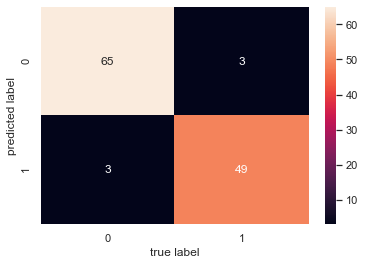

In [19]:
conf_lin(X_train,y_train,X_test,y_test,0.011,"25fe_li_bin49")

#### __RBF kernel__

In [20]:
rbf_fit(X_train,y_train,np.linspace(0.01,2,50),np.linspace(0,1,50))

(0.912062324929972,
 {'C': 1.3908163265306124, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           4       0.98      0.93      0.95        68
           9       0.91      0.98      0.94        52

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



(<matplotlib.axes._subplots.AxesSubplot at 0x23338ab9708>, None)

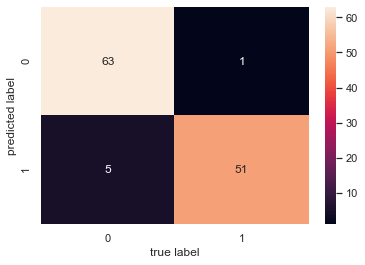

In [21]:
conf_rbf(X_train,y_train,X_test,y_test,1.3908163265306124,0.02040816326530612,"25fe_rbf_bin49")

### *Binary Classification using 10 features (Classes 4 and 9)*

In [23]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [26]:
lin_fit(X_train,y_train,np.linspace(0.001,1.2,100))

(0.8555851063829787, {'C': 0.001, 'kernel': 'linear'})

              precision    recall  f1-score   support

           4       0.85      0.93      0.89        68
           9       0.89      0.79      0.84        52

    accuracy                           0.87       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



(<matplotlib.axes._subplots.AxesSubplot at 0x2333845b688>, None)

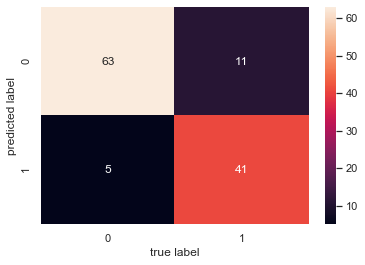

In [27]:
conf_lin(X_train,y_train,X_test,y_test,0.001,"10fe_li_bin49")

#### __RBF kernel__

In [28]:
rbf_fit(X_train,y_train,np.linspace(1,2.2,50),np.linspace(0,1,50))

(0.9057422969187674,
 {'C': 1.6122448979591837, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           4       0.96      0.96      0.96        68
           9       0.94      0.94      0.94        52

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



(<matplotlib.axes._subplots.AxesSubplot at 0x23338aa3f88>, None)

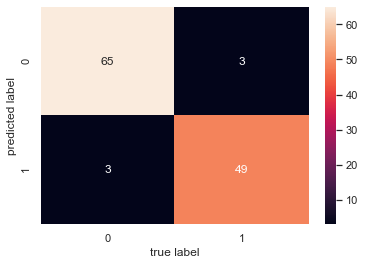

In [29]:
conf_rbf(X_train,y_train,X_test,y_test,1.6122448979591837,0.02040816326530612,"10fe_rbf_bin49")

### **Labels 2 and 7**

In [30]:
lab_zero_df = raw_df[raw_df['label']==2]   #Taking rows whose label values are 2
lab_one_df = raw_df[raw_df['label']==7]    #Taking all the rows whose label values are 7

# Joining the data having labels 2 and 7

frames = [lab_zero_df, lab_one_df]
df1 = pd.concat(frames) 

df = df1.sample(frac = 1) #randomizing the content 

### *Binary Classification using 25 features (Classes 2 and 7)*

In [31]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [32]:
lin_fit(X_train,y_train,np.linspace(0.001,0.01,100))

(0.9826923076923076, {'C': 0.0022727272727272726, 'kernel': 'linear'})

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        65
           7       0.98      0.98      0.98        65

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



(<matplotlib.axes._subplots.AxesSubplot at 0x233388bd708>, None)

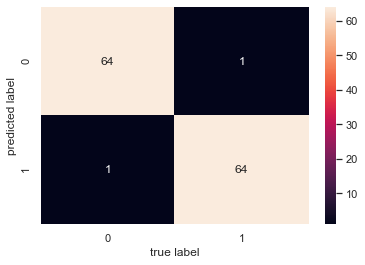

In [33]:
conf_lin(X_train,y_train,X_test,y_test,0.0022727272727272726,"25fe_li_bin27")

#### __RBF kernel__

In [34]:
rbf_fit(X_train,y_train,np.linspace(0.01,2,50),np.linspace(0,1,50))

(0.9057692307692308,
 {'C': 1.0659183673469388, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           2       0.86      0.98      0.92        65
           7       0.98      0.85      0.91        65

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.91       130
weighted avg       0.92      0.92      0.91       130



(<matplotlib.axes._subplots.AxesSubplot at 0x2333895b388>, None)

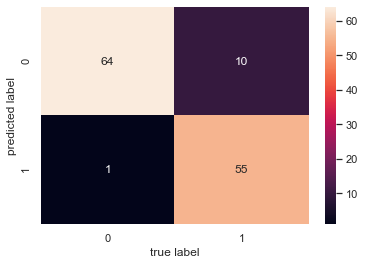

In [35]:
conf_rbf(X_train,y_train,X_test,y_test,1.0659183673469388,0.02040816326530612,"25fe_rbf_bin27")

### *Binary Classification using 10 features (Classes 2 and 7)*

In [36]:
feature_df = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

X = np.asarray(feature_df)

y = np.asarray(df['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [37]:
lin_fit(X_train,y_train,np.linspace(0.0001,0.1,100))

(0.9826923076923079, {'C': 0.0011090909090909092, 'kernel': 'linear'})

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        65
           7       0.98      0.98      0.98        65

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



(<matplotlib.axes._subplots.AxesSubplot at 0x233389a2408>, None)

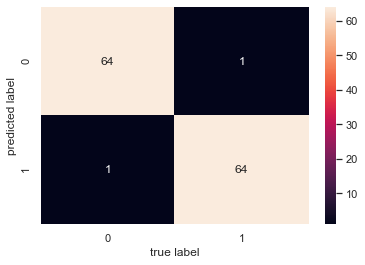

In [38]:
conf_lin(X_train,y_train,X_test,y_test,0.0011090909090909092,"10fe_li_bin27")

#### __RBF kernel__

In [39]:
rbf_fit(X_train,y_train,np.linspace(0.01,2,50),np.linspace(0,1,50))

(0.9730769230769232,
 {'C': 1.4314285714285715, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           2       0.97      1.00      0.98        65
           7       1.00      0.97      0.98        65

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.99      0.98      0.98       130



(<matplotlib.axes._subplots.AxesSubplot at 0x23338bfd448>, None)

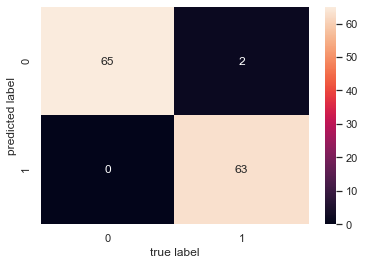

In [40]:
conf_rbf(X_train,y_train,X_test,y_test,1.4314285714285715,0.02040816326530612,"10fe_rbf_bin27")

## **2.2.3 Multiclass Classification**

### __*Multiclass Classification using all 25 features*__

In [41]:
dafr = raw_df

In [42]:
feature_df = dafr[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X = np.asarray(feature_df)

y = np.asarray(dafr['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [43]:
lin_fit(X_train,y_train,np.linspace(0.0001,2,100))

(0.8920833333333332, {'C': 0.0203010101010101, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.85      0.97      0.90        63
           2       0.88      0.83      0.85        63
           3       0.93      0.82      0.87        62
           4       0.95      0.95      0.95        56
           5       0.92      0.90      0.91        50
           6       0.94      0.95      0.95        65
           7       0.90      0.95      0.92        83
           8       0.85      0.83      0.84        48
           9       0.92      0.92      0.92        60

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



(<matplotlib.axes._subplots.AxesSubplot at 0x23338bf3e48>, None)

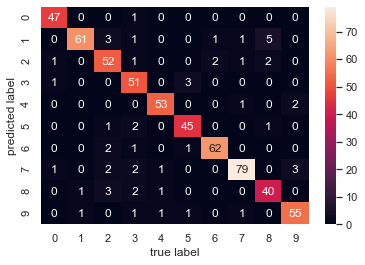

In [44]:
conf_lin(X_train,y_train,X_test,y_test,0.0203010101010101,"25fe_li_mcc")

#### __RBF kernel__

In [45]:
rbf_fit(X_train,y_train,np.linspace(0.001,5,50),np.linspace(0,1,50))

(0.8208333333333334,
 {'C': 2.449489795918367, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.95      0.97      0.96        63
           2       0.52      0.97      0.67        63
           3       0.92      0.77      0.84        62
           4       0.98      0.79      0.87        56
           5       0.98      0.90      0.94        50
           6       1.00      0.83      0.91        65
           7       0.93      0.84      0.89        83
           8       0.93      0.79      0.85        48
           9       0.91      0.87      0.89        60

    accuracy                           0.87       600
   macro avg       0.91      0.87      0.88       600
weighted avg       0.91      0.87      0.88       600



(<matplotlib.axes._subplots.AxesSubplot at 0x2333896fdc8>, None)

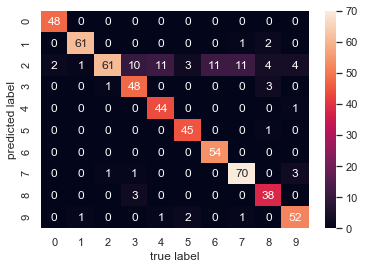

In [46]:
conf_rbf(X_train,y_train,X_test,y_test,2.449489795918367,0.02040816326530612,"25fe_rbf_mcc")

### __*Multiclass Classification 10 features*__

In [47]:
feature_df = dafr[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

X = np.asarray(feature_df)

y = np.asarray(dafr['label'])



X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

#### __Linear kernel__

In [48]:
lin_fit(X_train,y_train,np.linspace(0.0001,0.5,50))

(0.83375, {'C': 0.12252448979591839, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.87      0.98      0.93        63
           2       0.87      0.83      0.85        63
           3       0.85      0.82      0.84        62
           4       0.84      0.77      0.80        56
           5       0.89      0.80      0.84        50
           6       0.95      0.95      0.95        65
           7       0.88      0.90      0.89        83
           8       0.80      0.77      0.79        48
           9       0.72      0.80      0.76        60

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



(<matplotlib.axes._subplots.AxesSubplot at 0x23338fc8488>, None)

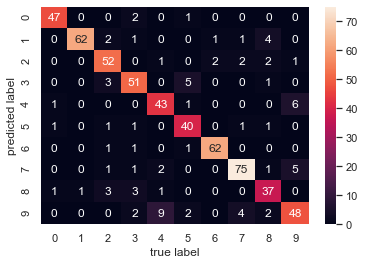

In [50]:
conf_lin(X_train,y_train,X_test,y_test,0.12252448979591839,"10fe_lin_mcc")

#### __RBF kernel__

In [51]:
rbf_fit(X_train,y_train,np.linspace(0.001,5,50),np.linspace(0,1,50))

(0.8804166666666667,
 {'C': 1.429285714285714, 'gamma': 0.02040816326530612, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.91      1.00      0.95        63
           2       0.89      0.89      0.89        63
           3       0.89      0.81      0.85        62
           4       0.88      0.79      0.83        56
           5       0.88      0.88      0.88        50
           6       0.97      0.92      0.94        65
           7       0.91      0.89      0.90        83
           8       0.86      0.79      0.83        48
           9       0.73      0.90      0.81        60

    accuracy                           0.88       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600



(<matplotlib.axes._subplots.AxesSubplot at 0x2333564e348>, None)

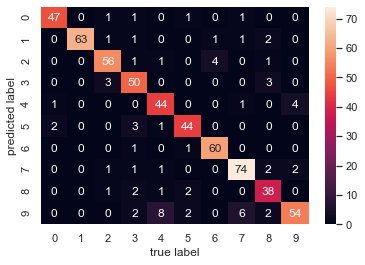

In [52]:
conf_rbf(X_train,y_train,X_test,y_test, 1.429285714285714,0.02040816326530612,"10fe_rbf_mcc")

# **2.3**

In [17]:
def lin_pred(X_train,y_train,x_predict,C_):
    classifier = svm.SVC(kernel='linear', C=C_)
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(x_predict)
    
    return y_predict

#function for producing confusion matrix for rbf kernel

def rbf_pred(X_train,y_train,X_predict,C_,g):
    classifier = svm.SVC(kernel='rbf',gamma=g, C=C_)
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_predict)
    
    return y_predict
    

In [18]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

## __Using all 25 features__

In [19]:
feature_df = train_df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X_unnormalized = np.asarray(feature_df)

y = np.asarray(train_df['label'])

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X_unnormalized)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [20]:
pred_feature_df = test_df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',
       'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21',
       'f22', 'f23', 'f24', 'f25']]

X_predict_unnormalized = np.asarray(pred_feature_df)

X_predict = min_max_scaler.fit_transform(X_predict_unnormalized)

#### __Linear kernel__

In [88]:
lin_fit(X_train,y_train,np.linspace(0.0001,2.3,50)) 

(0.9088750000000001, {'C': 1.7367591836734693, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       179
           1       0.92      0.99      0.95       215
           2       0.92      0.89      0.91       215
           3       0.89      0.82      0.85       190
           4       0.90      0.93      0.91       175
           5       0.83      0.89      0.86       186
           6       0.93      0.96      0.95       195
           7       0.91      0.91      0.91       224
           8       0.91      0.87      0.89       210
           9       0.88      0.82      0.85       211

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



(<matplotlib.axes._subplots.AxesSubplot at 0x2c5e4fb1048>, None)

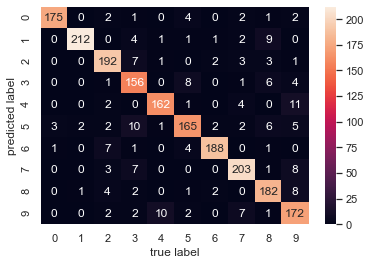

In [89]:
conf_lin(X_train,y_train,X_test,y_test,1.7367591836734693,"ukda_25fe_lin")

#### __*Linear kernel prediction on test dataset*__

In [90]:
y_predict_lin25fe = lin_pred(X_train,y_train,X_predict,1.7367591836734693)

#### __RBF kernel__

In [21]:
rbf_fit(X_train,y_train,np.linspace(2,5,10),np.linspace(2,5,10))

(0.969125,
 {'C': 3.333333333333333, 'gamma': 3.6666666666666665, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       179
           1       0.99      1.00      0.99       215
           2       0.97      0.97      0.97       215
           3       0.96      0.93      0.94       190
           4       0.95      0.97      0.96       175
           5       0.97      0.95      0.96       186
           6       0.97      0.97      0.97       195
           7       0.95      0.96      0.95       224
           8       0.96      0.98      0.97       210
           9       0.94      0.93      0.93       211

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



(<matplotlib.axes._subplots.AxesSubplot at 0x1d145c67148>, None)

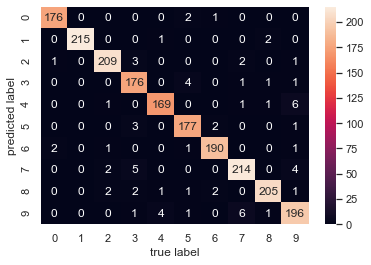

In [22]:
conf_rbf(X_train,y_train,X_test,y_test,3.333333333333333,3.6666666666666665,"ukda_25fe_rbf")

#### __Predictions for test data__

In [28]:
y_predict_rbf25fe = rbf_pred(X,y,X_predict,3.333333333333333,3.6666666666666665)

In [29]:
np.savetxt("k.csv",y_predict_rbf25fe,delimiter=",")

In [30]:
pd.DataFrame(data=y_predict_rbf25fe)

,0
0,3
1,5
2,2
3,7
4,6
...,...
1995,8
1996,1
1997,7
1998,2


## __Using 1st 10 features__

In [94]:
feature_df = train_df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

X_unnormalized = np.asarray(feature_df)

y = np.asarray(train_df['label'])

min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X_unnormalized)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 4)

In [95]:
pred_feature_df = test_df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

X_predict_unnormalized = np.asarray(pred_feature_df)

X_predict = min_max_scaler.fit_transform(X_predict_unnormalized)

#### __Linear kernel__

In [96]:
lin_fit(X_train,y_train,np.linspace(0.0001,2.3,50)) 

(0.83475, {'C': 1.9245061224489795, 'kernel': 'linear'})

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       179
           1       0.92      0.98      0.95       215
           2       0.86      0.83      0.84       215
           3       0.82      0.72      0.77       190
           4       0.78      0.78      0.78       175
           5       0.75      0.81      0.78       186
           6       0.89      0.92      0.91       195
           7       0.89      0.87      0.88       224
           8       0.83      0.84      0.84       210
           9       0.72      0.70      0.71       211

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



(<matplotlib.axes._subplots.AxesSubplot at 0x2c5e7afcc48>, None)

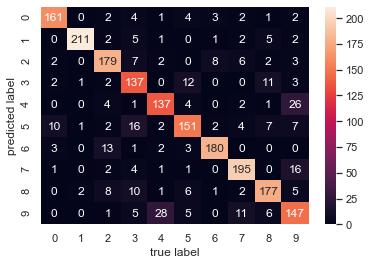

In [97]:
conf_lin(X_train,y_train,X_test,y_test,1.9245061224489795,"ukda_10fe_lin")

#### __*Linear kernel prediction on test dataset*__

In [98]:
y_predict_lin10fe = lin_pred(X_train,y_train,X_predict,1.9245061224489795)

#### __RBF kernel__

In [99]:
rbf_fit(X_train,y_train,np.linspace(4,5.2,10),np.linspace(6,8,10))

(0.927625, {'C': 4.8, 'gamma': 6.888888888888889, 'kernel': 'rbf'})

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       179
           1       0.97      0.99      0.98       215
           2       0.94      0.94      0.94       215
           3       0.93      0.85      0.89       190
           4       0.89      0.90      0.90       175
           5       0.92      0.90      0.91       186
           6       0.93      0.97      0.95       195
           7       0.94      0.92      0.93       224
           8       0.90      0.93      0.91       210
           9       0.87      0.86      0.86       211

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



(<matplotlib.axes._subplots.AxesSubplot at 0x2c5e7985848>, None)

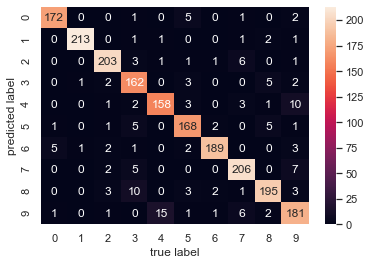

In [100]:
conf_rbf(X_train,y_train,X_test,y_test,4.8,6.888888888888889,"ukda_10fe_rbf")

#### __*Linear kernel prediction on test dataset*__

In [101]:
y_predict_rbf10fe = rbf_pred(X_train,y_train,X_predict,4.8,6.888888888888889)

In [111]:
np.savetxt("k.csv",y_predict_rbf25fe.astype(int),delimiter=",")

In [106]:
len(y_predict_rbf25fe)

2000